basic settings

In [2]:
%load_ext autoreload
%autoreload 2
from Analysis import *
# envs = ['U']

DATA ROOT: /Users/shin-yonghwan/Documents/GitHub/HeadEyeTracking/Datasets/2ndData


In [ ]:
data, horizontal_slope, vertical_slope = from_pickle('whole.pkl')

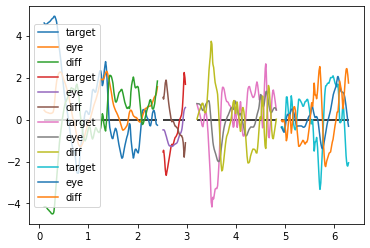

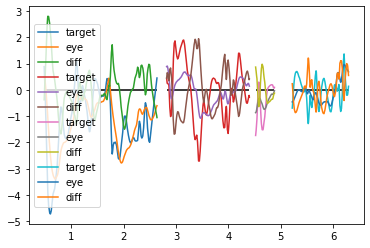

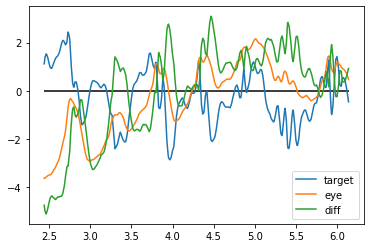

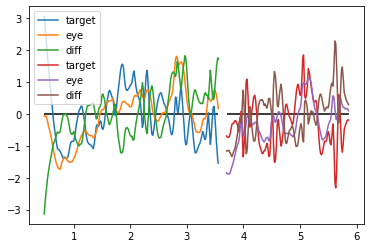

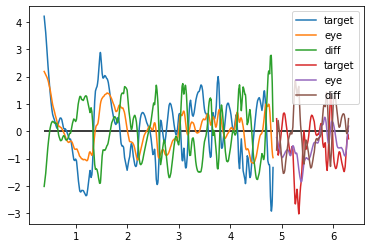

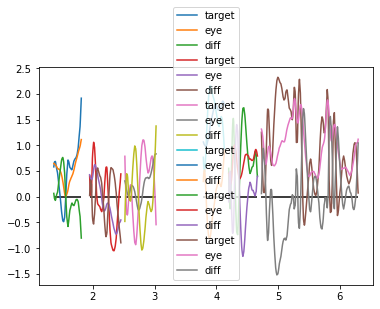

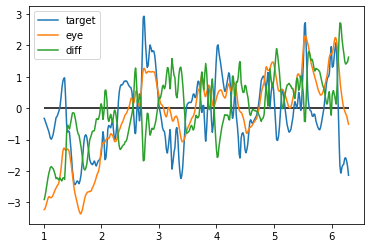

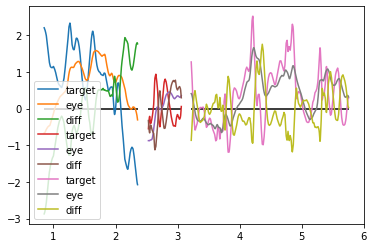

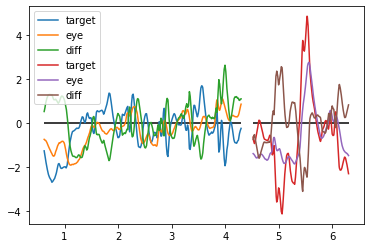

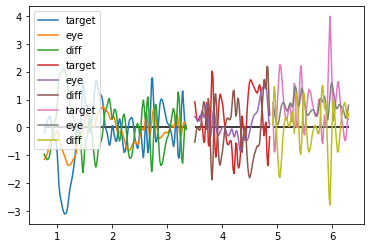

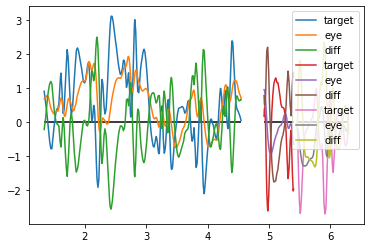

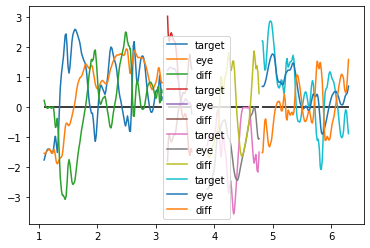

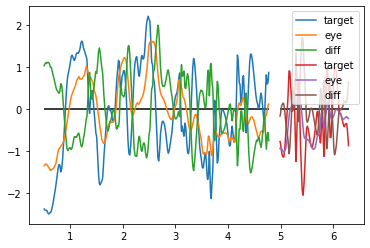

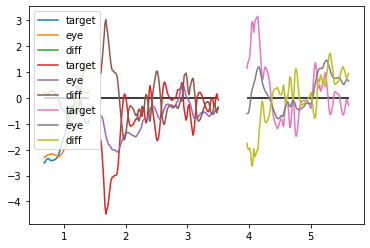

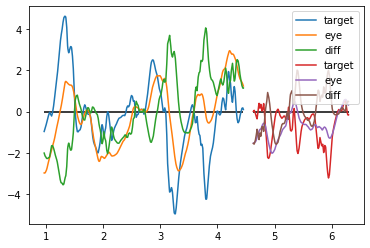

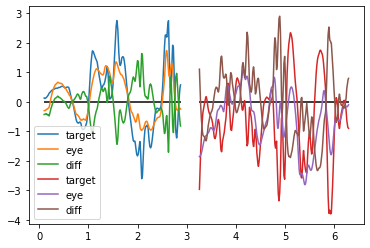

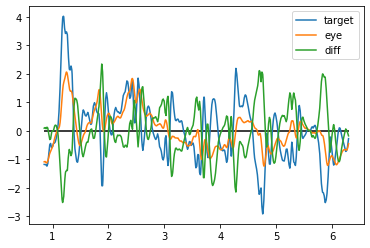

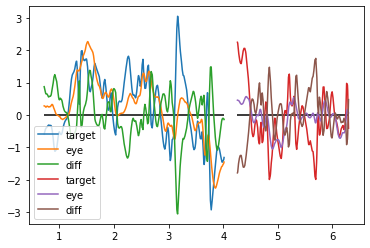

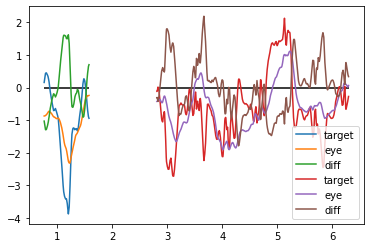

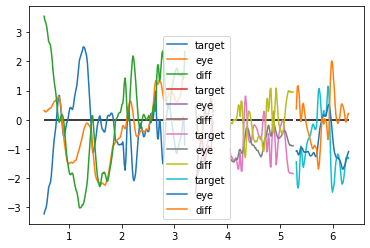

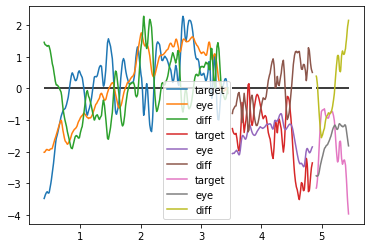

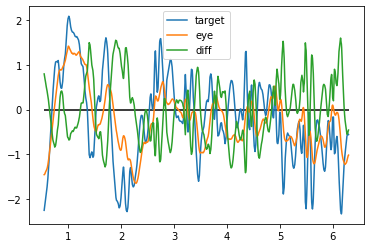

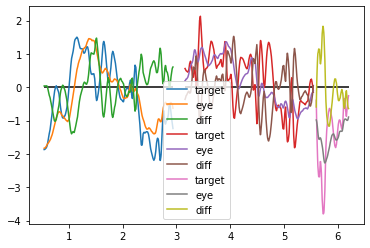

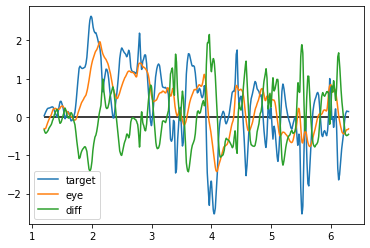

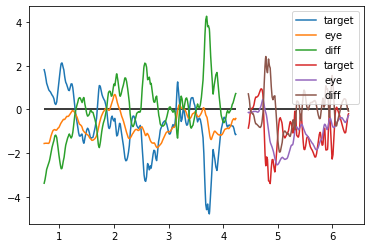

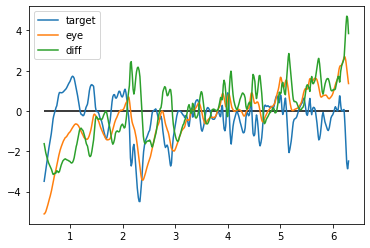

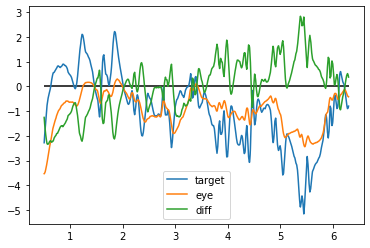

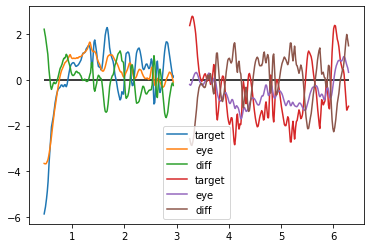

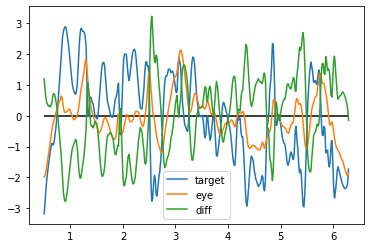

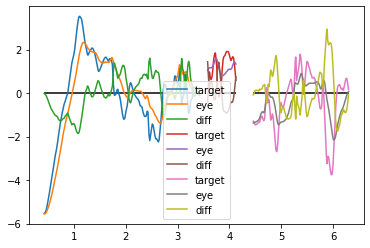

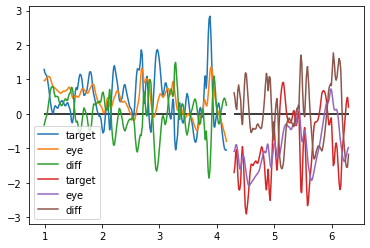

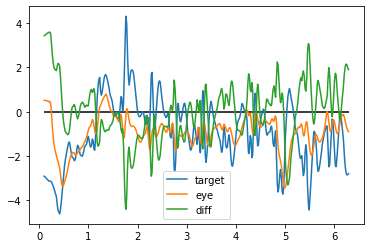

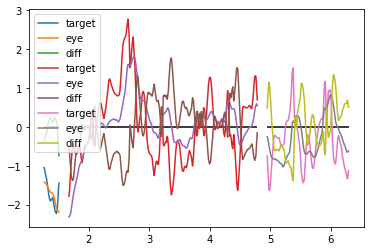

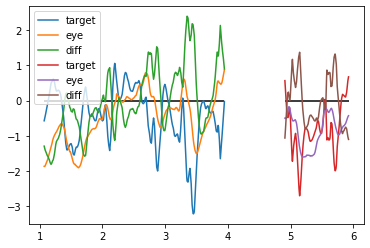

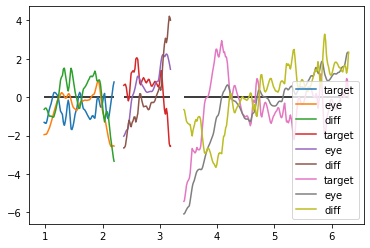

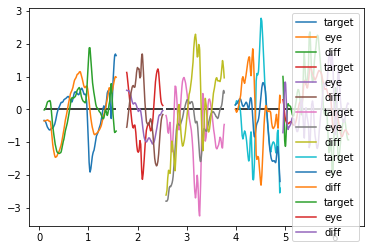

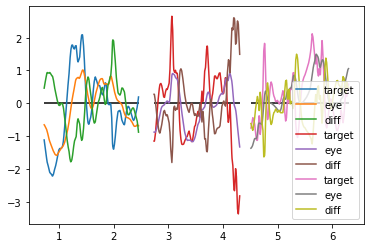

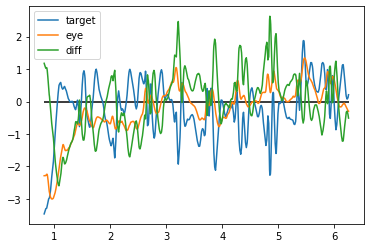

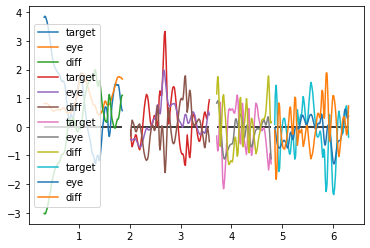

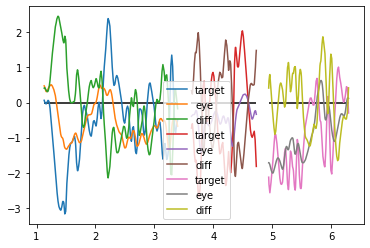

In [8]:
subject_data = lambda x: data[data['subject'] == x]
subject = {x: subject_data(x) for x in subjects}
for index, row in subject[201].iterrows():
    # print(row['x_axis'])
    if type(row['x_axis']) is not dict:
        # print('empty row')
        continue

    # each trial
    timeline = parse_timeline(row['low_conf']['start'], row['low_conf']['end'])
    for time in timeline:
        t1 = np.where(((row['x_axis']['test'] > time[0]) & (row['x_axis']['test'] < time[1])))
        if len(t1[0]) < 50:
            # print('too short timeline')
            continue
        t = np.arange(math.ceil(time[0] * 100) / 100, math.floor(time[1] * 100) / 100, 0.005)
        target_vertical = row['interpolations']['holoX'](t) + row['interpolations']['holoThe'](t)
        target_horizontal = row['interpolations']['holoY'](t) - row['interpolations']['holoPhi'](t)
        # headVertical = row['interpolations']['holoX'](t)
        # headHorizontal = row['interpolations']['holoY'](t)
        
        eye_vertical = (-1 * row['interpolations']['eyeY_raw'](t))
        eye_horizontal = (-1 * row['interpolations']['eyeX_raw'](t))
        filtered_eye_vertical = one_euro(eye_vertical)
        filtered_eye_horizontal = one_euro(eye_horizontal)
        # filtered_target_vertical = one_euro(target_vertical)
        # filtered_target_horizontal = one_euro(target_horizontal)
        # filtered_head_vertical = one_euro(headVertical)
        # filtered_head_horizontal = one_euro(headHorizontal)
        
        normalized_eye_vertical = (filtered_eye_vertical - filtered_eye_vertical.mean())*vertical_slope.mean() + target_vertical.mean()
        sns.lineplot(t,target_vertical,label='target' )
        sns.lineplot(t,normalized_eye_vertical,label='eye')
        sns.lineplot(t,normalized_eye_vertical-target_vertical,label='diff')
        plt.hlines(0,xmin=t[0],xmax=t[-1])
        # sns.lineplot(t,filtered_head_vertical,label='head')
        
    plt.legend()
    plt.show()